### Project Title: Sales Prediction Using Python
#### Done By: Nozipho Sithembiso Ndebele
---

<div style="text-align: center;">
<img src="https://assets.website-files.com/60e7f71b22c6d0b9cf329ceb/621e1a2f28ded71ee95aeede_6ProvenSalesForecastingMethodstoDriveRevenue1_a117440b5ae227c3dba5264a6521da06_2000.png" alt="Sales Image" width="1000"/>
</div>

---

## Table of Contents

<a href=#BC> Background Context</a>

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Data Collection and Description</a>

<a href=#three>3. Loading Data </a>

<a href=#four>4. Data Cleaning and Filtering</a>

<a href=#five>5. Exploratory Data Analysis (EDA)</a>

<a href=#six>6. Modeling </a>

<a href=#seven>7. Evaluation and Validation</a>

<a href=#eight>8. Final Model</a>

<a href=#nine>9. Conclusion and Future Work</a>

<a href=#ten>10. References</a>

---
 <a id="BC"></a>
## **Background Context**
Advertising is a critical component of a company’s marketing strategy. Understanding the impact of different advertising channels on product sales allows businesses to allocate their marketing budgets more effectively. In this project, the relationship between TV advertising and sales is analyzed using a simple linear regression model.

### Purpose
This project aims to build a simple linear regression model to predict product sales based on TV advertising spending. By quantifying the relationship between advertising investment and resulting sales, the aim to offer data-driven insights that can support decision-making in marketing strategies.

### Significance
Analyzing the relationship between advertising and sales is beneficial for:

- Understanding the effectiveness of TV advertising as a marketing channel.

- Providing a baseline for predictive modeling and linear regression in business analytics.

- Demonstrating how simple linear regression can be used to interpret real-world relationships.

- Helping marketers and business analysts optimize advertising budgets.

This analysis serves as a practical example of applying linear regression to real-world business data.

### Problem Domain
The dataset includes advertising expenditures across three media types, TV, Radio, and Newspaper and corresponding product sales. For this project, the focus on TV advertising as the sole independent variable to predict Sales using simple linear regression.

The aim is to determine:

- Whether there is a statistically significant linear relationship between TV ad spend and Sales.

- How much of the variation in Sales can be explained by the TV advertising budget.

### Challenges
- Linearity Assumption: Ensuring a linear relationship between TV advertising and sales.

- Residual Analysis: Verifying the assumptions of linear regression (e.g., normality, homoscedasticity).

- Feature Limitation: Only using TV as the predictor while ignoring other potentially relevant variables.

- Overfitting/Underfitting: Balancing model complexity and interpretability.

### Key Questions
- Is there a strong linear relationship between TV advertising and sales?

- What is the slope of the regression line, and how should it be interpreted?

- How much of the variance in sales is explained by TV ad spend?

- Can we reliably use TV advertising as a predictor of future sales?

---
<a href=#one></a>
## **Importing Packages**

### Purpose
To set up the Python environment with the necessary libraries for data manipulation, visualization, and machine learning. These libraries will facilitate data preprocessing, feature extraction, model training, and evaluation.

### Details
* Pandas: For handling and analyzing data.

* NumPy: For numerical operations.

* Matplotlib/Seaborn: For data visualization to understand trends and patterns.

* scikit-learn: For building and evaluating machine learning models.

* NLTK/Spacy: For text preprocessing and natural language processing tasks.

---

In [ ]:
# Import necessary packages  

# Data manipulation and analysis  
import pandas as pd  # Pandas for data handling  
import numpy as np  # NumPy for numerical operations  

# Data visualization  
import matplotlib.pyplot as plt  # Matplotlib for static plots  
import seaborn as sns  # Seaborn for statistical visualization  
import plotly.express as px  # Plotly for interactive plots  

# Natural Language Processing  
import nltk  # Natural Language Toolkit  
from nltk.corpus import stopwords  # Stopword removal  
from nltk.tokenize import word_tokenize  # Tokenization  
import re  # Regular expressions for text cleaning 

# Modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import pickle
from sklearn.model_selection import GridSearchCV

# Evaluation
from sklearn.metrics import mean_squared_error, r2_score

# Configure visualization settings
sns.set(style='whitegrid')  # Set the default style for Seaborn plots
plt.rcParams['figure.figsize'] = (10, 6)  # Set default figure size for Matplotlib

# Suppress warnings
import warnings  # Import the warnings module
warnings.filterwarnings('ignore')  # Ignore all warning messages


C:\Users\nozih\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


---
<a href=#two></a>
## **Data Collection and Description**
### Purpose
This section summarizes the structure and scope of the advertising dataset. Understanding the dataset is crucial for building an effective linear regression model and drawing valid business insights.

### Details
The dataset originates from the book "An Introduction to Statistical Learning" and captures advertising expenditure and product sales data across various markets.

- Source: Advertising dataset from ISLR (Introduction to Statistical Learning).

- Format: CSV file with 200 rows and 4 columns.

- Scope: Data includes spending on TV, Radio, and Newspaper advertising, and corresponding sales values.

### Types of Data
- `TV`	Budget spent on TV advertising (in thousands of dollars)
- `Radio`	Budget spent on radio advertising (in thousands of dollars)
- `Newspaper`	Budget spent on newspaper advertising (in thousands of dollars)
- `Sales`	Product sales (in thousands of units)

---
<a href=#three></a>
## **Loading Data**
### Purpose
The purpose of this section is to load the dataset into the notebook for further manipulation and analysis. This is the first step in working with the data, and it allows us to inspect the raw data and get a sense of its structure.

### Details
In this section, we will load the dataset into a Pandas DataFrame and display the first few rows to understand what the raw data looks like. This will help in planning the next steps of data cleaning and analysis.


---

In [2]:
# Load the dataset into a Pandas DataFrame

# The dataset is stored in a CSV file named 'advertising.csv'
df = pd.read_csv('advertising.csv')

In [3]:
# df is the original dataset (DataFrame), this creates a copy of it
df_copy = df.copy()

# Now 'df_copy' is an independent copy of 'df'. Changes to 'df_copy' won't affect 'df'.


In [4]:
# Display the first few rows of the dataset to get a sense of what the raw data looks like
df_copy.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [5]:
# Display the number of rows and columns in the dataset to understand its size
df_copy.shape

(200, 4)

In [6]:
# Check the structure of the dataset
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


---
<a href=#four></a>
## **Data Cleaning and Filtering**
Before analyzing the data, it is crucial to clean and filter it. This process involves handling missing values, removing outliers, correcting errors, and possibly reducing the data by filtering out irrelevant features. These steps ensure that the analysis is based on accurate and reliable data.

Details
In this section, we will:

* Check for Missing Values: Identify if there are any missing values in the dataset and handle them accordingly.
* Remove Duplicates: Ensure there are no duplicate rows that could skew the analysis.
* Correct Errors: Look for and correct any obvious data entry errors.
* Filter Data: Depending on the analysis requirements, filter the data to include only relevant records.

In [7]:
# 1. Check for missing values in the dataset

def check_missing_values(df):
    """
    Check for missing values in the dataset and display the number of missing values per column.

    Parameters:
    df (pandas.DataFrame): The dataset to check for missing values.

    Returns:
    pandas.Series: A series showing the number of missing values for each column.
    """
     # Check for missing values in the dataset and display them
    print("Missing values per column:")
    missing_values = df.isnull().sum()
    print(missing_values)
    return missing_values


In [ ]:
# df_copy is your DataFrame
missing_values = check_missing_values(df_copy)


Missing values per column:
TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


After examining the dataset, no missing values were found across any of the columns. This ensures data completeness and eliminates the need for imputation or further cleaning related to missing data.


In [9]:
# 2.Checks for duplicate rows in the dataset

def remove_duplicates(df):
    """
    Checks for duplicate rows in the dataset and removes them if any are found.

    Args:
    df (pandas.DataFrame): The dataframe to check for duplicate rows.

    Returns:
    pandas.DataFrame: The dataframe with duplicate rows removed, if any existed.
    """
    # Check for duplicate rows
    duplicate_rows = df.duplicated().sum()
    print(f"\nNumber of duplicate rows: {duplicate_rows}")
    
    # Remove duplicates if any exist
    if duplicate_rows > 0:
        df.drop_duplicates(inplace=True)
        print(f"Duplicate rows removed. Updated dataframe has {len(df)} rows.")
    else:
        print("No duplicate rows found.")
    
    return df

In [10]:
df_copy = remove_duplicates(df_copy)


Number of duplicate rows: 0
No duplicate rows found.


Upon reviewing the dataset, no duplicate rows were found. This ensures that all records are unique, and no further action is required for data deduplication.


## **Saving the Cleaned Dataset**
### Purpose

This section outlines how to save the cleaned dataset for future use. Saving the dataset ensures that the data cleaning process does not need to be repeated and allows for consistent use in subsequent analyses.

### Details

We will save the cleaned dataset as a CSV file.

In [11]:
# 3. Save the cleaned dataset to a new CSV file

def save_cleaned_dataset(df, filename='cleaned_advertising.csv'):
    """
    Saves the cleaned dataframe to a CSV file.

    Args:
    df (pandas.DataFrame): The cleaned dataframe to save.
    filename (str): The name of the file to save the dataframe to (default is 'cleaned_domestic_violence.csv').

    Returns:
    None
    """
    # Save the cleaned dataset to a CSV file
    df.to_csv(filename, index=False)
    print(f"Cleaned dataset saved successfully as '{filename}'.")


In [12]:
save_cleaned_dataset(df_copy)


Cleaned dataset saved successfully as 'cleaned_advertising.csv'.


---
<a href=#five></a>
## **Exploratory Data Analysis (EDA)**

It is the process of analyzing datasets to summarize key features, often through visualization methods. It aims to discover patterns, spot anomalies, and formulate hypotheses for deeper insights, which informs subsequent analysis.
#### Advantages

- Helps in understanding the data before modeling.
- Provides insights that guide feature selection and engineering.
- Assists in choosing appropriate modeling techniques.
- Uncovers potential data quality issues early.

`The following methods were employed to communicate our objective:`



---


1. Summary Statistics

Checking central tendencies, dispersion, and shape of feature distributions.

In [13]:
# Descriptive statistics
df_copy.describe()


,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


- TV advertising has the highest average spend (~147K), followed by Newspaper and Radio.

- Sales range from 1.6 to 27 units, with a mean around 15.13 units.

- Distributions are fairly spread, indicating diversity in advertising budgets and outcomes across the dataset.

2. Distribution of Sales

How the sales values are distributed.

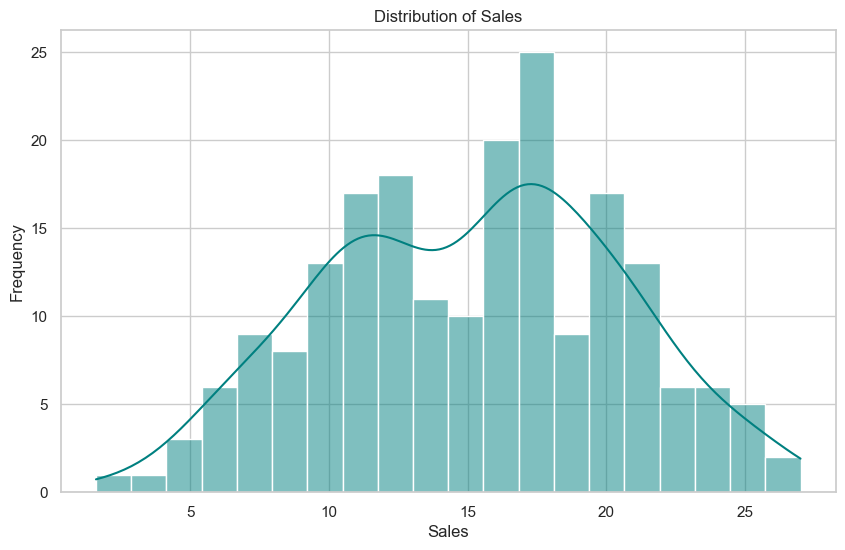

In [14]:
sns.histplot(df_copy['Sales'], kde=True, bins=20, color='teal')
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()


- The sales distribution is right-skewed, suggesting that most sales values are clustered between 10–20, with fewer high-performing campaigns.

- This implies diminishing returns at higher advertising levels or saturation effects.

3. Pairplot of All Features

Visualizing pairwise relationships and correlations.

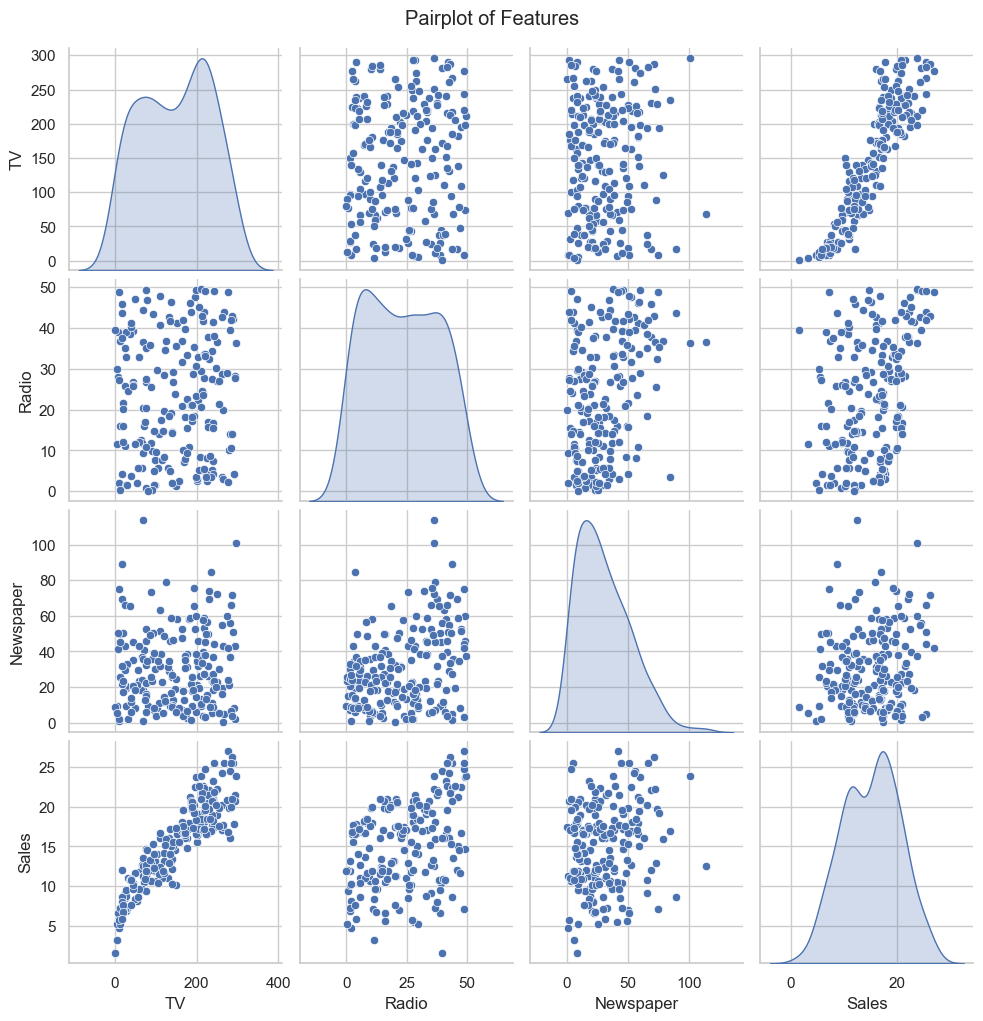

In [15]:
sns.pairplot(df_copy, diag_kind='kde')
plt.suptitle('Pairplot of Features', y=1.02)
plt.show()


- Clear positive linear trend between TV and Sales.

- Radio shows a moderate correlation.

- Newspaper displays no clear linear relationship, suggesting it may be a weak predictor.

- No extreme multicollinearity among features.

4. Correlation Matrix

Exploring relationships between numeric variables.

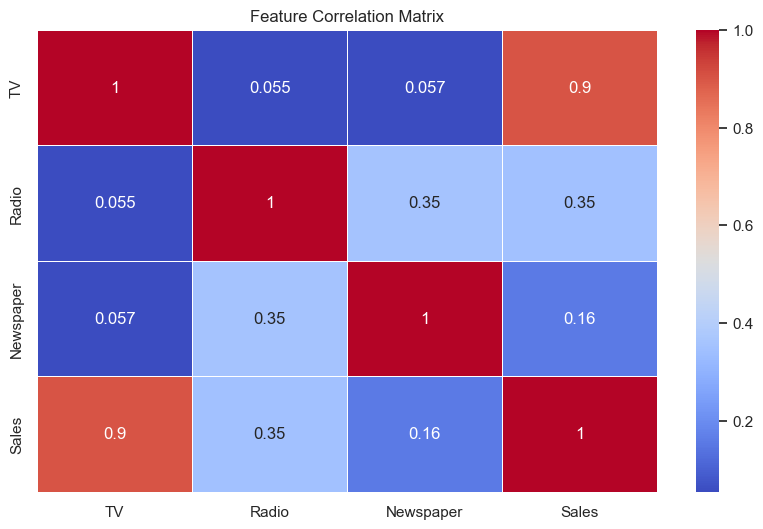

In [16]:
# Compute the correlation matrix
corr_matrix = df_copy.corr()

# Plot heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Matrix')
plt.show()


- TV and Sales: Strongest correlation (0.9), making it the best single predictor.

- Radio and Sales: Moderate correlation (0.35).

- Newspaper and Sales: Weak correlation (0.16), possibly negligible for regression modeling.

- TV and Radio show slight positive correlation (0.055), indicating independence in media strategy.

5. Scatter Plots of Features vs Sales

These visuals help to understand which advertising medium influences sales the most.

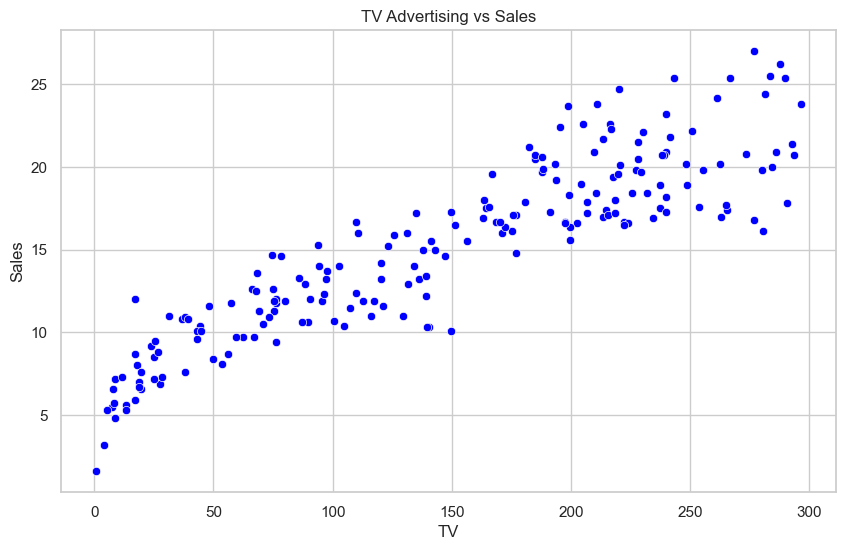

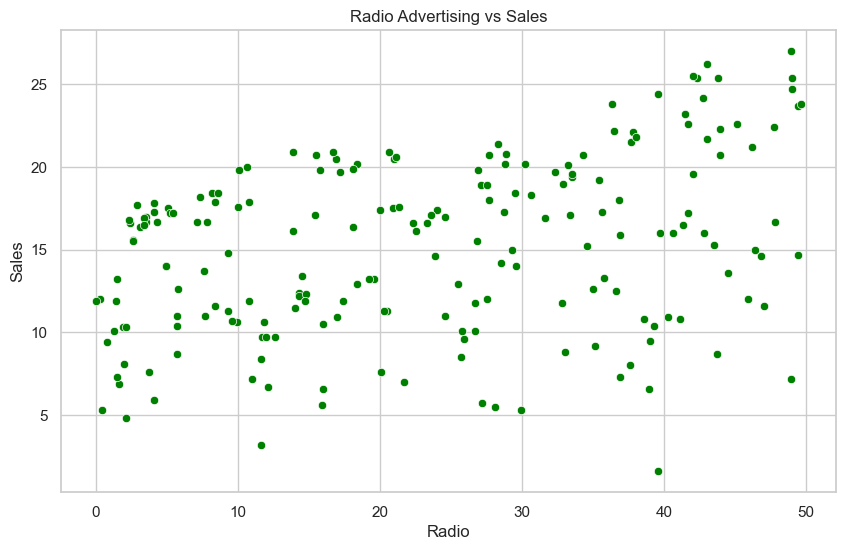

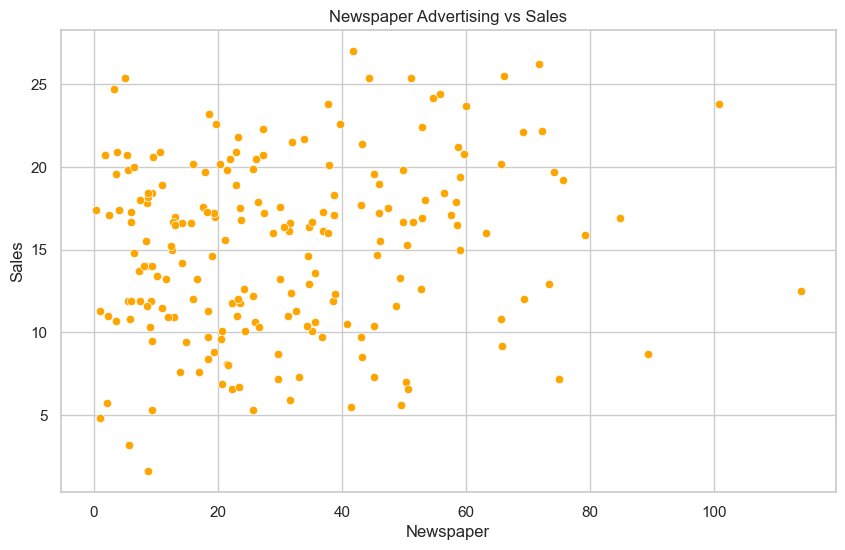

In [17]:
# TV vs Sales
sns.scatterplot(x='TV', y='Sales', data=df_copy, color='blue')
plt.title('TV Advertising vs Sales')
plt.show()

# Radio vs Sales
sns.scatterplot(x='Radio', y='Sales', data=df_copy, color='green')
plt.title('Radio Advertising vs Sales')
plt.show()

# Newspaper vs Sales
sns.scatterplot(x='Newspaper', y='Sales', data=df_copy, color='orange')
plt.title('Newspaper Advertising vs Sales')
plt.show()


- TV vs Sales: Linear upward trend → validates use of linear regression.

- Radio vs Sales: Also positively correlated, but with more spread.

- Newspaper vs Sales: Scattered with no clear pattern → adds noise if used in the model without tuning.

6. Boxplots for Outlier Detection

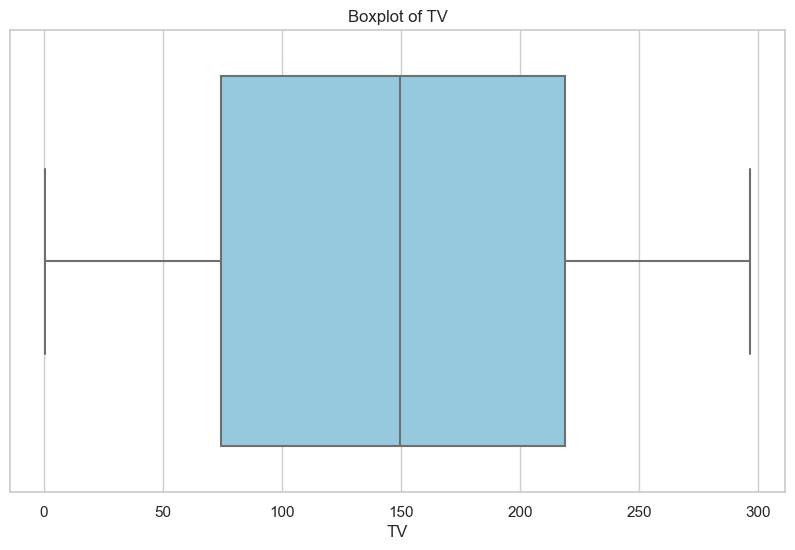

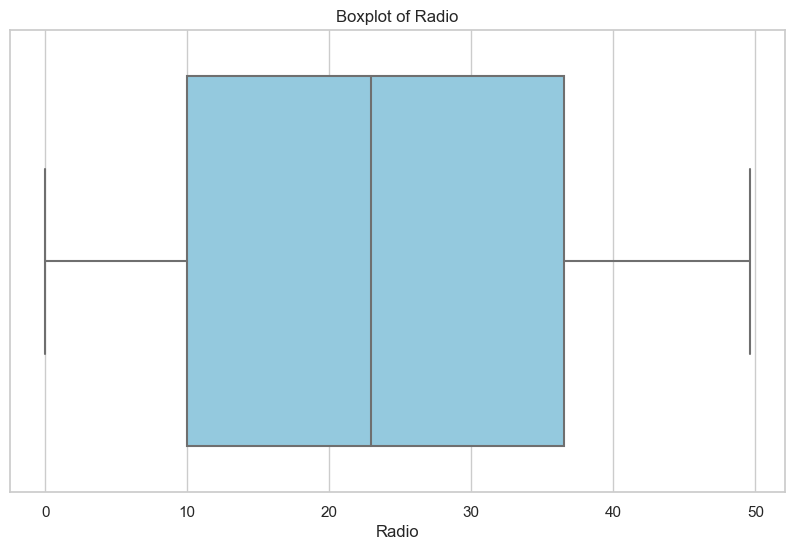

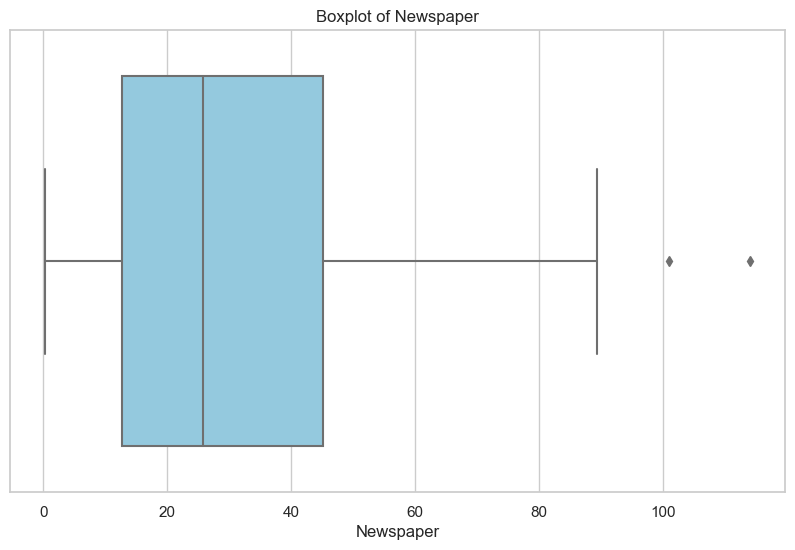

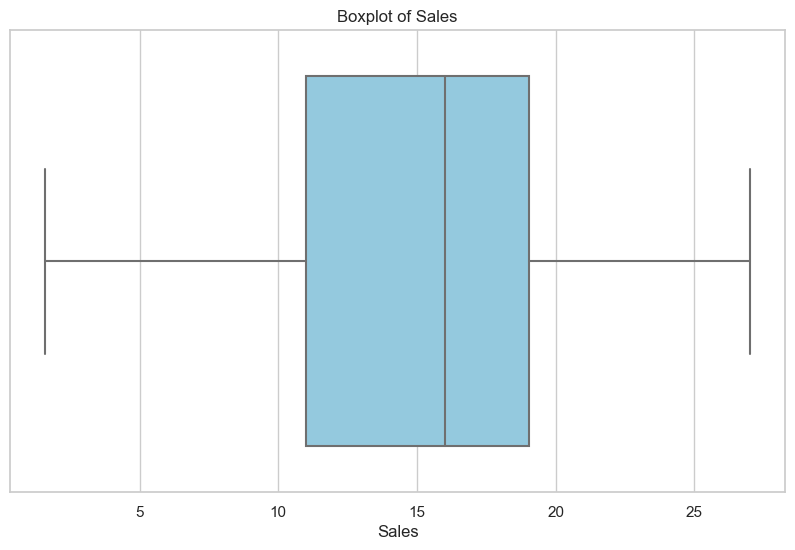

In [18]:
# Boxplots for each feature
for col in ['TV', 'Radio', 'Newspaper', 'Sales']:
    sns.boxplot(x=df_copy[col], color='skyblue')
    plt.title(f'Boxplot of {col}')
    plt.show()


- TV and Radio: A few potential high-value outliers, but within reason.

- Newspaper: Shows several high outliers beyond 100K.

- Sales: Mostly within range; no extreme outliers that could disrupt regression analysis.

### Summary

- TV advertising has the strongest impact on sales and is suitable for use in a simple linear regression model.

- Newspaper ads contribute the least to predicting sales and may be excluded or treated separately.

- Radio shows moderate influence and could enhance performance in a multiple regression setup.

- The dataset is clean, balanced, and ideal for modeling without requiring extensive preprocessing.

## **Modeling**

##### Purpose
The goal of this section is to train different regression models to predict Sales based on TV advertising expenditure, compare their performances, and select the best-performing model.

##### Details
We will:

- Split the dataset into training and testing sets.

- Train multiple regression models:

  - Linear Regression (baseline model)

  - Decision Tree Regressor (non-linear model)

  - Random Forest Regressor (ensemble model)

- Evaluate their performance using appropriate regression metrics.

In [19]:
def train_regression_models(df, target='Sales'):
    """
    Trains multiple regression models and evaluates their performance.

    Args:
    df (pandas.DataFrame): The dataset containing features and target.
    target (str): The name of the target column.

    Returns:
    dict: A dictionary containing trained models and their evaluation metrics.
    """
    # 1. Split features and target
    X = df[['TV']]  # Only using TV as predictor
    y = df[target]

    # 2. Train-test split (80% train, 20% test)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # 3. Initialize models
    models = {
        'Linear Regression': LinearRegression(),
        'Decision Tree Regressor': DecisionTreeRegressor(random_state=42),
        'Random Forest Regressor': RandomForestRegressor(random_state=42, n_estimators=100)
    }

    # 4. Train and evaluate each model
    results = {}

    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, y_pred)

        results[name] = {
            'model': model,
            'MSE': mse,
            'RMSE': rmse,
            'R² Score': r2
        }

        print(f"Model: {name}")
        print(f"Mean Squared Error (MSE): {mse:.4f}")
        print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
        print(f"R² Score: {r2:.4f}")
        print('-' * 40)

    return results


In [20]:
# Train models and evaluate
model_results = train_regression_models(df_copy)

Model: Linear Regression
Mean Squared Error (MSE): 6.1011
Root Mean Squared Error (RMSE): 2.4700
R² Score: 0.8026
----------------------------------------
Model: Decision Tree Regressor
Mean Squared Error (MSE): 6.0561
Root Mean Squared Error (RMSE): 2.4609
R² Score: 0.8040
----------------------------------------
Model: Random Forest Regressor
Mean Squared Error (MSE): 5.1557
Root Mean Squared Error (RMSE): 2.2706
R² Score: 0.8332
----------------------------------------


1. Random Forest Regressor is the best performing model overall.

  - It has the lowest MSE (5.1557) and lowest RMSE (2.2706), meaning its errors are smaller compared to the other two models.

  - It also achieved the highest R² score (0.8332), meaning it explains 83.32% of the variance in the target variable — that's a strong fit!

2. Decision Tree Regressor and Linear Regression are very close in performance.

  - Their MSE and RMSE are almost identical (just slightly better for Decision Tree).

  - Their R² scores are also very close (0.8040 vs 0.8026), suggesting both models explain about 80% of the variance.

3. Linear Regression is slightly the weakest model.

While not bad, it has:

  - The highest error (both MSE and RMSE),

  - And the lowest R² score among the three models.

  - Still, with an R² of 0.8026, it’s doing a good job.

## **Evaluation and Validation**

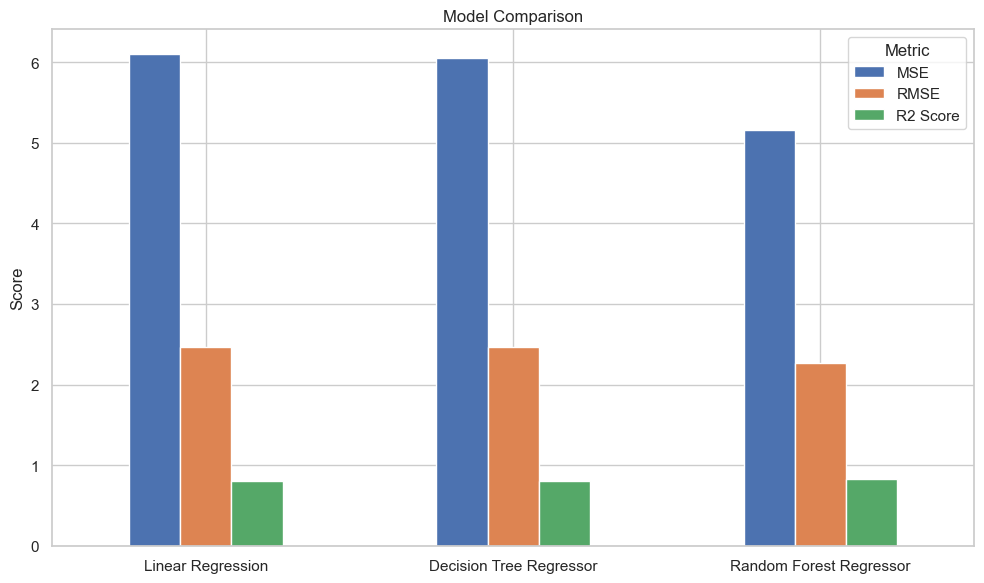

In [21]:
# Create the results DataFrame
results = pd.DataFrame({
    'Linear Regression': {
        'MSE': 6.1011,
        'RMSE': 2.4700,
        'R2 Score': 0.8026
    },
    'Decision Tree Regressor': {
        'MSE': 6.0561,
        'RMSE': 2.4609,
        'R2 Score': 0.8040
    },
    'Random Forest Regressor': {
        'MSE': 5.1557,
        'RMSE': 2.2706,
        'R2 Score': 0.8332
    }
})

# Transpose and plot
results.T.plot(kind='bar', figsize=(10,6))
plt.title('Model Comparison')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.legend(title='Metric')
plt.tight_layout()
plt.show()


##### Insights & Recommendations:

- Random Forest Regressor would be the preferred model for making predictions in this case because of its better accuracy and generalization power.

- Decision Tree Regressor could still be a good alternative if you prioritize model simplicity or interpretability (e.g., in real-world deployment).

- Linear Regression is useful for baseline comparison — it's a simple model, but in this case, more complex models like Random Forest deliver noticeably better performance.



## **Hyperparameter Tuning**

In [ ]:
# Split features and target
X = df_copy[['TV']]
y = df_copy['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree Regressor - Hyperparameter tuning
dt_params = {
    'max_depth': [2, 4, 6, 8, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
dt_model = DecisionTreeRegressor(random_state=42)
dt_grid = GridSearchCV(dt_model, dt_params, cv=5, scoring='r2')
dt_grid.fit(X_train, y_train)
best_dt = dt_grid.best_estimator_

# Random Forest Regressor - Hyperparameter tuning
rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
rf_model = RandomForestRegressor(random_state=42)
rf_grid = GridSearchCV(rf_model, rf_params, cv=5, scoring='r2')
rf_grid.fit(X_train, y_train)
best_rf = rf_grid.best_estimator_


#### Evaluate Tuned Models

In [ ]:
# Evaluate tuned Decision Tree
dt_pred = best_dt.predict(X_test)
dt_mse = mean_squared_error(y_test, dt_pred)
dt_rmse = np.sqrt(dt_mse)
dt_r2 = r2_score(y_test, dt_pred)

print("Tuned Decision Tree Regressor")
print(f"MSE: {dt_mse:.4f}, RMSE: {dt_rmse:.4f}, R²: {dt_r2:.4f}\n")

# Evaluate tuned Random Forest
rf_pred = best_rf.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_pred)
rf_rmse = np.sqrt(rf_mse)
rf_r2 = r2_score(y_test, rf_pred)

print("Tuned Random Forest Regressor")
print(f"MSE: {rf_mse:.4f}, RMSE: {rf_rmse:.4f}, R²: {rf_r2:.4f}")


Tuned Decision Tree Regressor
MSE: 5.9264, RMSE: 2.4344, R²: 0.8082

Tuned Random Forest Regressor
MSE: 5.3441, RMSE: 2.3117, R²: 0.8271


Key Observations:
- Performance Improved: Both models showed slight improvements after tuning compared to their default versions.

- Random Forest Remains Superior: Even after tuning, the Random Forest Regressor retained its position as the best model.

- Decision Tree’s Stability: While not outperforming Random Forest, the tuned Decision Tree still performed well and may be a viable option in resource-constrained environments.

### Pickle the Tuned Models

In [ ]:
# Save tuned Decision Tree model
with open('tuned_decision_tree_regressor.pkl', 'wb') as dt_file:
    pickle.dump(best_dt, dt_file)

# Save tuned Random Forest model
with open('tuned_random_forest_regressor.pkl', 'wb') as rf_file:
    pickle.dump(best_rf, rf_file)


---
<a href=#nine></a>
## **Conclusion and Future Work**


##### Conclusion
This project aimed to build predictive models to estimate sales based on TV advertising expenditure using various regression techniques. The following conclusions were drawn:

- Random Forest Regressor delivered the best predictive performance with an R² score of 0.8332 (default) and 0.8271 (tuned).

- Linear Regression, although simple and interpretable, lagged slightly behind, with an R² score of 0.8026.

- Hyperparameter tuning via GridSearchCV led to modest improvements in both Decision Tree and Random Forest models, reinforcing the importance of tuning in improving model performance.

The analysis confirms that TV advertising spend is a strong predictor of sales, and ensemble methods like Random Forest capture the underlying patterns more effectively than simple linear models.


##### Future Work

To further enhance this project, the following steps are recommended:

1. Incorporate Additional Features

   - Include other advertising channels like Radio and Newspaper to see if they add predictive power.

   - Introduce temporal variables (e.g., month, quarter) to detect seasonal sales patterns.

2. Use Advanced Models

   - Explore boosting techniques such as XGBoost or LightGBM for potentially better performance.

   - Try Polynomial Regression to capture non-linear trends in simpler models.

3. Cross-Validation Enhancements

   - Employ k-fold cross-validation for a more robust estimation of generalization error.

---
<a href=#ten></a>
## **References**
- advertising Dataset [advertising.csv]. Retrieved from Kaggle: https://www.kaggle.com/code/ashydv/sales-prediction-simple-linear-regression/input

- Sales Prediction Image [IRIS.jpg]. Retrieved from https://assets.website-files.com/60e7f71b22c6d0b9cf329ceb/621e1a2f28ded71ee95aeede_6ProvenSalesForecastingMethodstoDriveRevenue1_a117440b5ae227c3dba5264a6521da06_2000.png

- Ndebele, N. (2025). sales prediction Tool [(https://salesbaseapp.streamlit.app/)]. Developed using Streamlit.

## Additional Sections to Consider

**Contributors**: Nozipho Sithembiso Ndebele
